In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv("accepted_2007_to_2018Q4.csv")
pd.options.display.max_rows=999
data1.loc[1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                                                                     68355089
member_id                                                                                   NaN
loan_amnt                                                                               24700.0
funded_amnt                                                                             24700.0
funded_amnt_inv                                                                         24700.0
term                                                                                  36 months
int_rate                                                                                  11.99
installment                                                                              820.28
grade                                                                                         C
sub_grade                                                                                    C1
emp_title                               

In [3]:
data2=pd.read_csv("rejected_2007_to_2018Q4.csv")
pd.options.display.max_rows=999
data2.loc[1]

Amount Requested                    1000.0
Application Date                2007-05-26
Loan Title              Consolidating Debt
Risk_Score                           703.0
Debt-To-Income Ratio                   10%
Zip Code                             010xx
State                                   MA
Employment Length                 < 1 year
Policy Code                            0.0
Name: 1, dtype: object

In [4]:
data1=data1[['loan_amnt','issue_d','title','fico_range_low','dti','zip_code','addr_state','emp_length','policy_code']]

In [5]:
data1.dtypes

loan_amnt         float64
issue_d            object
title              object
fico_range_low    float64
dti               float64
zip_code           object
addr_state         object
emp_length         object
policy_code       float64
dtype: object

In [6]:
data2.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [7]:
data2['Debt-To-Income Ratio'].unique()

array(['10%', '38.64%', '9.43%', ..., '1986.02%', '1154.55%', '21215.75%'],
      dtype=object)

In [8]:
nosymb=data2['Debt-To-Income Ratio'].str.replace('%','')
data2['Debt-To-Income Ratio']=pd.to_numeric(nosymb)

In [9]:
data2.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [10]:
new_names=data2.columns
old_names=data1.columns

data1 = data1.rename(columns=dict(zip(old_names,new_names)))
data1.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

In [11]:
data1['Application Date']=pd.to_datetime(data1['Application Date'],format="%b-%Y")
data1['Application Date']=pd.PeriodIndex(data1['Application Date'],freq='Q')

In [12]:
data1.dropna()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,3600.0,2015Q4,Debt consolidation,675.0,5.91,190xx,PA,10+ years,1.0
1,24700.0,2015Q4,Business,715.0,16.06,577xx,SD,10+ years,1.0
3,35000.0,2015Q4,Debt consolidation,785.0,17.06,076xx,NJ,10+ years,1.0
4,10400.0,2015Q4,Major purchase,695.0,25.37,174xx,PA,3 years,1.0
5,11950.0,2015Q4,Debt consolidation,690.0,10.20,300xx,GA,4 years,1.0
...,...,...,...,...,...,...,...,...,...
2260692,16000.0,2016Q4,Medical expenses,665.0,12.25,284xx,NC,10+ years,1.0
2260693,24000.0,2016Q4,Credit card refinancing,725.0,10.98,967xx,HI,4 years,1.0
2260694,24000.0,2016Q4,Home improvement,665.0,19.61,356xx,AL,7 years,1.0
2260695,24000.0,2016Q4,Debt consolidation,695.0,34.94,840xx,UT,10+ years,1.0


In [13]:
data2['Application Date']=pd.to_datetime(data2['Application Date'],format="%Y-%m-%d")
data2['Application Date']=pd.PeriodIndex(data2['Application Date'],freq='Q')

In [14]:
data2.dropna()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007Q2,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0
1,1000.0,2007Q2,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0
2,11000.0,2007Q2,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0
3,6000.0,2007Q2,waksman,698.0,38.64,017xx,MA,< 1 year,0.0
4,1500.0,2007Q2,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0
...,...,...,...,...,...,...,...,...,...
27648733,30000.0,2016Q4,Debt consolidation,681.0,55.15,726xx,AR,< 1 year,0.0
27648734,1000.0,2016Q4,Debt consolidation,531.0,31.31,761xx,TX,< 1 year,0.0
27648736,10000.0,2016Q4,Debt consolidation,590.0,41.26,441xx,OH,< 1 year,0.0
27648738,1200.0,2016Q4,Other,686.0,10.26,914xx,CA,< 1 year,0.0


In [15]:
data1['Accepted']=1
data2['Accepted']=0

In [16]:
data_final=data2.append(data1,ignore_index=True)

In [17]:
data_final.head

<bound method NDFrame.head of           Amount Requested Application Date                        Loan Title  \
0                   1000.0           2007Q2  Wedding Covered but No Honeymoon   
1                   1000.0           2007Q2                Consolidating Debt   
2                  11000.0           2007Q2       Want to consolidate my debt   
3                   6000.0           2007Q2                           waksman   
4                   1500.0           2007Q2                            mdrigo   
...                    ...              ...                               ...   
29909437           40000.0           2016Q4                               NaN   
29909438           24000.0           2016Q4                Debt consolidation   
29909439           14000.0           2016Q4                               NaN   
29909440               NaN              NaT                               NaN   
29909441               NaN              NaT                               NaN  

In [18]:
data_final.dropna()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,Accepted
0,1000.0,2007Q2,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0.0,0
1,1000.0,2007Q2,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0.0,0
2,11000.0,2007Q2,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0.0,0
3,6000.0,2007Q2,waksman,698.0,38.64,017xx,MA,< 1 year,0.0,0
4,1500.0,2007Q2,mdrigo,509.0,9.43,209xx,MD,< 1 year,0.0,0
...,...,...,...,...,...,...,...,...,...,...
29909433,16000.0,2016Q4,Medical expenses,665.0,12.25,284xx,NC,10+ years,1.0,1
29909434,24000.0,2016Q4,Credit card refinancing,725.0,10.98,967xx,HI,4 years,1.0,1
29909435,24000.0,2016Q4,Home improvement,665.0,19.61,356xx,AL,7 years,1.0,1
29909436,24000.0,2016Q4,Debt consolidation,695.0,34.94,840xx,UT,10+ years,1.0,1


In [19]:
temp=data_final[data_final['Employment Length']=='10+ years']
temp=pd.to_numeric(temp['Employment Length'].str.replace('\+ years',''))
temp2=data_final[data_final['Employment Length']=='<1 year']
temp3=data_final[data_final['Employment Length']=='1 year']
temp2=pd.to_numeric(temp2['Employment Length'].str.replace('<1 year',''))
temp3=pd.to_numeric(temp3['Employment Length'].str.replace(' year',''))
tempb2=data_final[data_final['Employment Length']=='2 years']
tempb3=data_final[data_final['Employment Length']=='3 years']
tempb4=data_final[data_final['Employment Length']=='4 years']
tempb5=data_final[data_final['Employment Length']=='5 years']
tempb6=data_final[data_final['Employment Length']=='6 years']
tempb7=data_final[data_final['Employment Length']=='7 years']
tempb8=data_final[data_final['Employment Length']=='8 years']
tempb9=data_final[data_final['Employment Length']=='9 years']
tempb2=pd.to_numeric(tempb2['Employment Length'].str.replace(' years', ''))
tempb3=pd.to_numeric(tempb3['Employment Length'].str.replace(' years', ''))
tempb4=pd.to_numeric(tempb4['Employment Length'].str.replace(' years', ''))
tempb5=pd.to_numeric(tempb5['Employment Length'].str.replace(' years', ''))
tempb6=pd.to_numeric(tempb6['Employment Length'].str.replace(' years', ''))
tempb7=pd.to_numeric(tempb7['Employment Length'].str.replace(' years', ''))
tempb8=pd.to_numeric(tempb8['Employment Length'].str.replace(' years', ''))
tempb9=pd.to_numeric(tempb9['Employment Length'].str.replace(' years', ''))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_3972/783076285.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  temp=pd.to_numeric(temp['Employment Length'].str.replace('\+ years',''))


In [20]:
df1 = temp.append(temp2)
df2 = df1.append(temp3)
df3 = df2.append(tempb2)
df4 = df3.append(tempb3)
df5 = df4.append(tempb4)
df6 = df5.append(tempb5)
df7 = df6.append(tempb6)
df8 = df7.append(tempb7)
df9 = df8.append(tempb8)
df = df9.append(tempb9)

In [21]:
data_final['Employment_Length']=df

In [22]:
data_final=data_final.drop('Employment Length',axis=1)

In [23]:
data_final.head

<bound method NDFrame.head of           Amount Requested Application Date                        Loan Title  \
0                   1000.0           2007Q2  Wedding Covered but No Honeymoon   
1                   1000.0           2007Q2                Consolidating Debt   
2                  11000.0           2007Q2       Want to consolidate my debt   
3                   6000.0           2007Q2                           waksman   
4                   1500.0           2007Q2                            mdrigo   
...                    ...              ...                               ...   
29909437           40000.0           2016Q4                               NaN   
29909438           24000.0           2016Q4                Debt consolidation   
29909439           14000.0           2016Q4                               NaN   
29909440               NaN              NaT                               NaN   
29909441               NaN              NaT                               NaN  

In [24]:
data_final['Employment_Length']=data_final['Employment_Length'].fillna(0)

In [25]:
data_final.head

<bound method NDFrame.head of           Amount Requested Application Date                        Loan Title  \
0                   1000.0           2007Q2  Wedding Covered but No Honeymoon   
1                   1000.0           2007Q2                Consolidating Debt   
2                  11000.0           2007Q2       Want to consolidate my debt   
3                   6000.0           2007Q2                           waksman   
4                   1500.0           2007Q2                            mdrigo   
...                    ...              ...                               ...   
29909437           40000.0           2016Q4                               NaN   
29909438           24000.0           2016Q4                Debt consolidation   
29909439           14000.0           2016Q4                               NaN   
29909440               NaN              NaT                               NaN   
29909441               NaN              NaT                               NaN  

In [26]:
data_final.dropna()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Policy Code,Accepted,Employment_Length
0,1000.0,2007Q2,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,0.0,0,4.0
1,1000.0,2007Q2,Consolidating Debt,703.0,10.00,010xx,MA,0.0,0,0.0
2,11000.0,2007Q2,Want to consolidate my debt,715.0,10.00,212xx,MD,0.0,0,1.0
3,6000.0,2007Q2,waksman,698.0,38.64,017xx,MA,0.0,0,0.0
4,1500.0,2007Q2,mdrigo,509.0,9.43,209xx,MD,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
29909433,16000.0,2016Q4,Medical expenses,665.0,12.25,284xx,NC,1.0,1,10.0
29909434,24000.0,2016Q4,Credit card refinancing,725.0,10.98,967xx,HI,1.0,1,4.0
29909435,24000.0,2016Q4,Home improvement,665.0,19.61,356xx,AL,1.0,1,7.0
29909436,24000.0,2016Q4,Debt consolidation,695.0,34.94,840xx,UT,1.0,1,10.0


<AxesSubplot:xlabel='Accepted', ylabel='Amount Requested'>

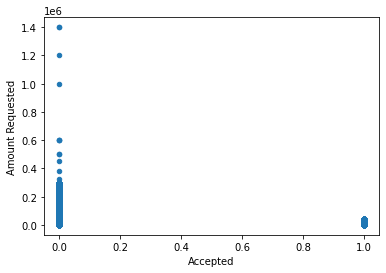

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize']=10000
data_final.plot(x='Accepted',y='Amount Requested',kind='scatter')

<AxesSubplot:xlabel='Accepted', ylabel='Risk_Score'>

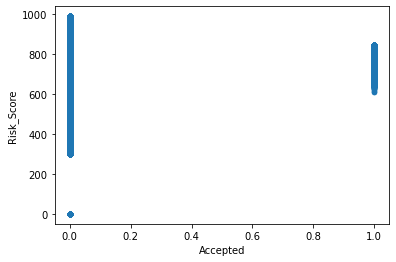

In [28]:
data_final.plot(x='Accepted',y='Risk_Score',kind='scatter')

<AxesSubplot:xlabel='Accepted', ylabel='Debt-To-Income Ratio'>

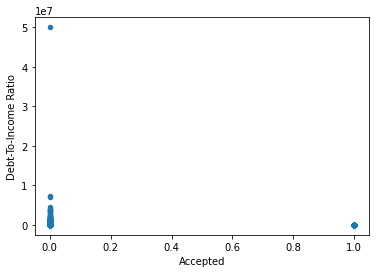

In [29]:
data_final.plot(x='Accepted',y='Debt-To-Income Ratio',kind='scatter')

<AxesSubplot:xlabel='Accepted', ylabel='Policy Code'>

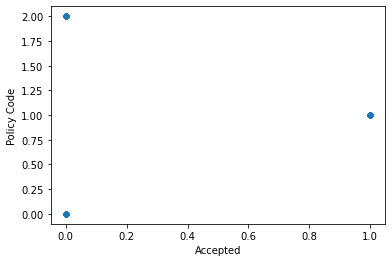

In [30]:
data_final.plot(x='Accepted',y='Policy Code',kind='scatter')

<AxesSubplot:xlabel='Accepted', ylabel='Employment_Length'>

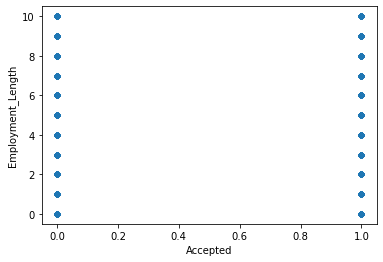

In [31]:
data_final.plot(x='Accepted',y='Employment_Length',kind='scatter')